# IMPORT VARI

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

with open('data/heroes.csv', 'r') as heroes_file:
  heroes_reader = csv.reader(heroes_file, delimiter=';', quotechar='"')
  heroes = list(heroes_reader)[1:]

# LEZIONE 1: ROBACCIA DI PYTHON VARIA

### Slicing e accesso posizionale
- "Gli slicing basati su indice comprenderanno il primo e l'ultimo valore specificato mentre gli slice basati su posizione escluderanno l'ultimo elemento.
    - ```first_appearance['Wonder Girl':'Wonder Woman']```
    - ```first_appearance[60:63]```
- L'accesso posizionale può anche fare riferimento a numeri negativi, contando in analogia a liste e tuple a partire dall'ultimo elemento
    - ```first_appearance[-5:]```
- L'accesso alle liste può anche essere fatto specificando una lista (ma non una tupla) di posizioni al posto di una sola posizione, con l'effetto di ottenere i corrispondenti elementi.
    - ```first_appearance[[1, 42, 709]]```
- vi sono anche funzioni come .head() e .tail()
si può utilizzare una lista di valori booleani in cui True indica gli elementi da estrarre e False quelli da filtrare:
    - ```first_appearance[[1970 <= y <1975 for y in first_appearance]]```
- Infine, è possibile effettuare delle query su una serie specificando tra parentesi quadre un'espressione logica che indica quali elementi visualizzare, utilizzando la serie come simbolo che ne indica un suo generico elemento:
    - ```first_appearance[first_appearance > 2010]```
    - Se voglio fare altre condizioni, devo per forza utilizzare l'and bitwise:
    - ```first_appearance[(first_appearance>2010)and(first_appearance%2==1)]``` NON VA BENE
    - ```first_appearance[(first_appearance>2010)&(first_appearance%2==1)]```

# LEZIONE 2 PANDAS

### Series
- Una delle classi principali implementate in pandas è Series.

In [2]:
years = [int(h[7]) if h[7] else None for h in heroes]
names = [h[0] for h in heroes]
first_appearance = pd.Series(years, index = names)

- possiamo filtrare roba come visto negli appunti sopra su python
- value_counts() restituisce un'altra serie in cui gli indici sono i valori osservati e i valori le corrispondenti frequenze assolute, ordinate in senso non crescente:

In [3]:
absolutes=first_appearance.value_counts()
absolutes

1964.0    18
1963.0    18
1965.0    14
2004.0    11
1975.0    10
          ..
2013.0     1
1983.0     1
1933.0     1
1948.0     1
1988.0     1
Name: count, Length: 71, dtype: int64

### Visualizzazione Grafia Serie

- ```.plot()``` permette di visualizzare graficamente i contenuti di una serie, utilizzando matplotlib dietro le quinte; in particolare, il metodo bar visualizza un grafico a barre
- ```.show()``` permette di mostrarlo poi a video
- fare solamente cosi molte volte fa schifo, il grafico viene illeggibile. Lavorare con i valori assoluti molte volte e' meglio
- Cosi ancora non è il massimo. Son necessarie piu informazioni:

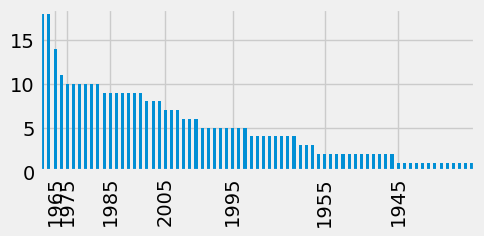

In [4]:
years = np.arange(1945, 2010, 10)
index_pos = [absolutes.index.get_loc(y) for y in years]
absolutes.plot.bar()
plt.xticks(index_pos, years)
plt.ylim((0, 18.5))
plt.show()

- Per generare il grafico precedente è necessario utilizzare alcune funzionalità avanzate delle librerie considerate: 
  - `np.arange` permette di costruire un array i cui valori vanno di dieci in dieci partendo da 1945 e arrivando a 2005; la proprietà 
  - `index` di una serie permette di estrarne l'indice e il metodo 
  - `get_loc` di quest'ultimo restituisce la posizione corrispondente a un dato valore dell'indice. 
  - Infine, il metodo `xticks` di matplotlib permette di specificare quali valori evidenziare sull'asse delle ascisse e quali etichette utilizzare.

# LEZIONE 3 DATAFRAME

# LEZIONE 4

- Ripartizione Empirica -> Diagramma a scalini (Funzione costante a tratti)
- **CAMPIONE** = insieme di dati su cui mi baso per le mie analisi statistiche
    - Ripartizione Empirica ci permette di generare un grafico a scaletta.
    - Prende anche il nome di **Funzione di distribuzione cumulativa empirica**

- scegliere un campione in modo rappresentativo significa non fare "favoritismi": Non posso estrarre chi mi fa comodo, tutti devono avere la stessa chance di finire nel mio campione.

## POSIZIONE E CENTRALITA

### MEDIA CAMPIONARIA

- calcolabile solamente per i dati **quantitativi**
- mi permette di rappresentare qualcosa con un solo valore.

#### Caratteristiche Media Campionaria
- la media campionaria SOFFRE parecchio gli outlier ( ovvero valori o troppo alti o troppo bassi rispetto al campione )
- Spesso e volentieri non corrisponde ad alcun valore del campione

##### Traslazione
- Se ho una media calcolata (m) di un campionario C={x1,...,xn} e traslo gli elementi di un valore +n allora anche la media viene traslata di +n

##### Scalabilità
- Se ho una media calcolata (m) di un campionario C={x1,...,xn} e scalo gli elementi di un valore n allora anche la media viene scalata di n

##### Trasformazioni Afffini
- stesso discorso vale per le trasformazioni affini 

#### Esempio

MEAN VALUE IS 1.6



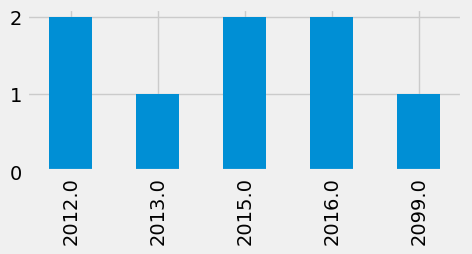

In [5]:
absolutes=first_appearance[(first_appearance>2011)].value_counts().sort_index()
print("MEAN VALUE IS "+str(absolutes.mean()))
print()
absolutes.plot.bar()
plt.show()

### MEDIANA CAMPIONARIA
- non è influenzata dagli outlier
- la mediana è il valore precisamente al centro del mio campione **ordinato**
- se il valore è pari non ho un valore centrale bensi due quindi in quel caso bisogna **calcolare la media dei due valori**. Questa procedura va bene per i dati di tipo **quantitativi e qualitativi**

#### ESEMPIO

In [6]:
print("MEDIAN VALUE IS "+str(absolutes.median()))
print()
absolutes

MEDIAN VALUE IS 2.0



2012.0    2
2013.0    1
2015.0    2
2016.0    2
2099.0    1
Name: count, dtype: int64

### MODA CAMPIONARIA
- non è altro che il valore che si presenta con maggior frequenza

In [7]:
print("MODA VALUE IS "+str(absolutes.max()))
print()
absolutes

MODA VALUE IS 2



2012.0    2
2013.0    1
2015.0    2
2016.0    2
2099.0    1
Name: count, dtype: int64

## DISPERSIONE

### VARIAZIONE CAMPIONARIA
- Consideriamo:
    - Campione A = {1,2,5,6,6}
    - Campione B = {-40,0,5,20,35}
- otteniamo facilmente che
    - media campionaria A = 4
    - media campionaria B = 4
- Entrambi i valori si concentrano su 4 ma si disperdono in modo completamente diverso
- per calcolare la dispersione utilizziamo la formula della **varianza campionaria**
- Di seguito la funzione riportata

\begin{equation}
\hat F(x) = \frac{\# \{ x_i \leq x \}}{n}
= \frac{1}{n} \sum_{i=1}^n \mathrm I_{(-\infty, x]}(x_i) ,
\end{equation}

- $\mathrm I_A: \mathbb R \mapsto \{0, 1\}$ indica la _funzione indicatrice_ dell'insieme $A$, che assume valore nullo in corrispondenza di tutti gli argomenti che non appartengono ad $A$ e valore unitario altrimenti, e $(-\infty, x]$ indica l'intervallo semiaperto identificato da tutti i valori reali minori o uguali a $x$. Per un generico argomento $x$, la funzione cumulativa empirica assumerà pertanto come valore la frequenza relativa cumulata del più grande tra i valori osservati $x_i \leq x$.
- Dunque il suo grafico sarà quello di una funzione costante a tratti. In python è presente un'implementazione della funzione cumulativa empirica nel modulo `statmodels.api`: la funzione `distributions.ECDF` accetta come input un insieme di osservazioni e restituisce la corrispondente funzione cumulativa empirica. Possiamo quindi elaborare in tal senso gli anni di prima apparizione e visualizzare il grafico corrispondente agli anni tra il 1980 e il 1990, così da poter effettuare un confronto con l'analogo grafico precedentemente generato:

#### TRASLAZIONE
- rimange invariata, la traslazione di valori del campione non comporta alcuna modifica con la varianza.
- questa varianza, viene identificata con "s" e il suo valore ha come unita di misura quella base al quadrato. 
- se voglio ottenere una vairanza con unita di misura uguale all'originale, calcolo la radice quadrata. Cosi facendo ottengo la **deviazione standard**
- Esempio

In [8]:
print("varianza: "+str(absolutes.var()))
traslate=absolutes+3
print("varianza: traslata: "+str(traslate.var()))

varianza: 0.3
varianza: traslata: 0.3


#### SCALABILITA
- Se voglio verificare la scalablità per un valore b, ottengo che la varianza campionaria cambia (non ricordo la formula per calcolare quanto viene traslata )
- Esempio:

In [9]:
print("varianza: "+str(absolutes.var()))
traslate=absolutes*3
print("varianza scalata: "+str(traslate.var()))

varianza: 0.3
varianza scalata: 2.7


## DEVIAZIONE STANDARD
- detta in parole molto brutte, non è altro che la radice quadrata della varianza
- infatti:

In [10]:
print("varianza: "+str(absolutes.var()))
print("varianza: "+str(absolutes.std()))

varianza: 0.3
varianza: 0.5477225575051661


#### TRASLAZIONE
- come per la varianza, rimane invariata chiaramente:
- Esempio:

In [11]:
print("STD: "+str(absolutes.std()))
traslate=absolutes+3
print("STD traslata: "+str(traslate.std()))

STD: 0.5477225575051661
STD traslata: 0.5477225575051661


#### SCALABILITA
- come per la varianza, varia:
- Esempio:

In [12]:
print("STD: "+str(absolutes.std()))
traslate=absolutes*3
print("STD SCALATA: "+str(traslate.std()))

STD: 0.5477225575051661
STD SCALATA: 1.6431676725154984


### COEFF. DI VARIAZIONE
- Il coefficiente di variazione (CV) è una misura di statistica descrittiva che aiuta a quantificare in modo oggettivo quanto sia grande il valore di una deviazione standard rispetto alla sua media.
- si calcola nel seguente modo:
\begin{equation}
\frac{std}{media}
\end{equation}
- Esempio:

In [13]:
print("STD: "+str(absolutes.std()))
print("COEFF VARIAZIONE: "+str(absolutes.std()/absolutes.mean()))

STD: 0.5477225575051661
COEFF VARIAZIONE: 0.34232659844072877


### PERCENTILE CAMPIONARIO
- dipende dal "livello" p dove questo p è un numero che esprime una percentuale.
- se al posto di percentuale, il livello lo esprimo in
    - 0, ... ,1  -> parlo di **quantili**
    - 0, ... ,4 ->  parlo di **quartili**
    - 0, ... ,10 -> parlo di **decili**
- posso vedere informazioni su percentili e altro con il metodo .describe

In [14]:
heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)
year = heroes['First appearance']
year.describe() 

count     367.000000
mean     1979.855586
std        19.717218
min      1933.000000
25%      1965.000000
50%      1979.000000
75%      1994.000000
max      2099.000000
Name: First appearance, dtype: float64

- se voglio accedere ad un particolare livello di quantile posso fare in questo modo

In [15]:
print(year.quantile(.15))
print(year.quantile(.75))

1963.0
1994.0


### BOX PLOT
- è una rappresentazione grafica che riassume le principali caratteristiche di un campione di dati.
- Tale rappresentazione contiene due componenti principali:
    - una _scatola_, intesa come un rettangolo che evidenzia il primo e il terzo quartile campionario dei dati, che corrispondono alle due basi, e la mediana, indicata tramite un segmento parallelo alle basi stesse;
    - due _baffi_, che si estendono dagli estremi della scatola fino a raggiungere il minimo e il massimo valore osservato.

- A titolo di esempio la cella seguente visualizza il box plot relativo all'anno di prima apparizione.

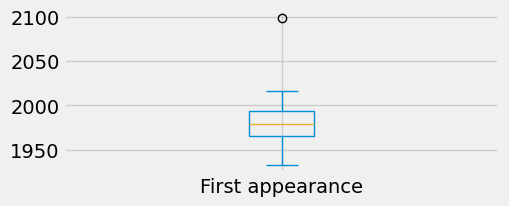

In [16]:
year.plot.box()
plt.show()

- Questo grafico mette in evidenza:
    - la centralità delle osservazioni, tramite il segmento che individua la mediana campionaria;
    - la dispersione delle osservazioni:
        - sia in termini di range interquartile (l'altezza della scatola)
        - che di intervallo di variazione dei dati (la distanza tra gli estremi dei baffi).
- Vale la pena sottolineare che la presenza di eventuali valori mancanti non influisce sulla generazione del grafico.
- necessario specificare "whis" ( whiskers, baffi ) per non mostrare gli outliers ( i cerchietti ). ( da me non funziona, chiedere al prof )
- Il BOX PLOT si puo anche generare verticalmente:

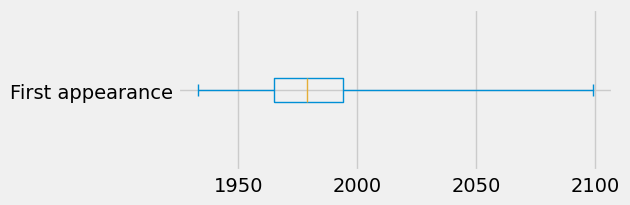

In [17]:
year.plot.box(vert=False,whis=10) # mettendo un valore numerico funziona, forse il range viene specificato con un valore ora? idk
plt.show()

# LEZIONE 5
- presente su carta (impossibile da scrivere qua )

# LEZIONE 6
- riferimentoi:
    - "L03-Dati_e_frequenze"
    - "L04-Indici_di_dispersione"

## DIAGRAMMA DI PARETO

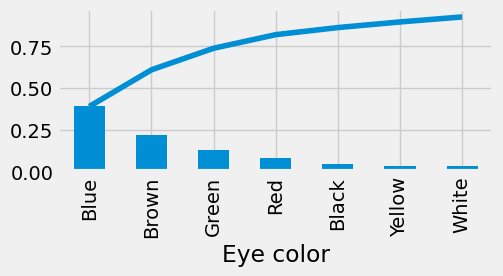

In [18]:
eye_color = heroes['Eye color']
eye_color_freq = eye_color.value_counts(normalize=True)

eye_color_freq[eye_color_freq>.02].cumsum().plot()
eye_color_freq[eye_color_freq>.02].plot.bar()
plt.show()

- comodo per avere informazioni sulle frequenze cumulate
- normalize=true significa che vogliamo le frequenze relative
- filtro quelle con almeno il 2% per togliere le osservazioni farlocche
- Va notato come la linea spezzata nel precedente diagramma non arrivi all'ordinata 1, avendo considerato solo un sottoinsieme dei dati: possiamo verificarlo, oltre che visualmente, sommando le frequenze relative:

In [20]:
sum(eye_color_freq[eye_color_freq>.02])

0.9271758436944938

- Se dividiamo tutte le frequenze per la somma ottenuta, apportiamo alle frequenze una correzione che fa sì che ora la loro somma sia esattamente uno (spesso si usa il termine _normalizzazione_ per indicare un'operazione di questo tipo).
- Il diagramma di Pareto per i valori ottenuti considerando questa correzione si estende ora fino all'ordinata unitaria.

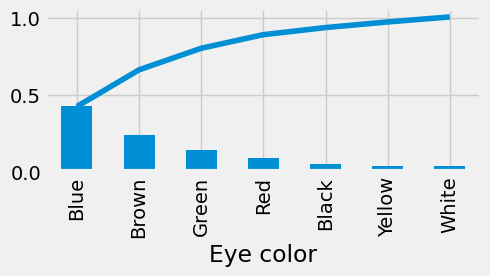

In [21]:
norm_eye_color_freq = eye_color_freq[eye_color_freq>.02]/0.92
norm_eye_color_freq.cumsum().plot()
norm_eye_color_freq.plot.bar()
plt.show()

## FREQUENZE CONGIUNTE E MARGINALI

In [23]:
int_gender_freq = pd.crosstab(index=heroes['Intelligence'], 
                              columns=heroes['Gender'])

int_gender_freq

Gender,F,M
Intelligence,,
average,38,101
good,78,165
high,27,112
low,0,13
moderate,21,37


- crosstab ci restituisce un dataframe, quindi quello che io posso fare senza problemi è accedere alle sue colonne
- se voglio modificare l'ordine delle colonne del dataframe posso farlo senza problemi:

In [24]:
int_gender_freq = int_gender_freq.reindex(['low', 'moderate',
                                           'average', 'good', 'high'])
int_gender_freqint_gender_freq.loc[:,['M', 'F']]

Gender,F,M
Intelligence,,
low,0,13
moderate,21,37
average,38,101
good,78,165
high,27,112


- Siccome `crosstab` produce dei dataframe, per riordinare le colonne è sufficiente accedere alla tabella tramite `loc` e specificando come secondo argomento una lista dei valori nell'ordine desiderato:

In [25]:
int_gender_freq.loc[:,['M', 'F']]

Gender,M,F
Intelligence,,
low,13,0
moderate,37,21
average,101,38
good,165,78
high,112,27


- Nel caso in cui si volessero calcolare le frequenze congiunte e almeno uno dei caratteri fosse numerico, si rischierebbe di ricadere nello stesso problema descritto quando abbiamo parlato degli istogrammi: si consideri per esempio il tentativo di calcolare le frequenze congiunte di peso e genere:

In [26]:
pd.crosstab(index=heroes['Weight'], columns=[heroes['Gender']]).iloc[:10,:]

Gender,F,M
Weight,,
2.34,0,1
4.82,0,1
9.79,0,1
14.67,0,1
16.20,0,1
17.01,0,1
18.11,0,1
18.45,0,1
19.00,0,1


- Essenzialmente in ogni riga c'è un valore nullo e uno unitario, semplicemente perché succede quasi sempre che un particolare valore del peso specificato fino ai decigrammi occorra un'unica volta nelle osservazioni.
- È quindi opportuno raggruppare assieme pesi «vicini» tra loro. Ciò viene fatto utilizzando la funzione `pd.cut`, che converte una serie di valori numerici in una serie qualitativa i cui valori possibili sono gli intervalli di una partizione aventi per estremi i valori specificati in corrispondenza dell'argomento `bins`.
- Considerando questa nuova serie è possibile generare una tabella di frequenze congiunte più significativa.

In [27]:
pd.crosstab(index=pd.cut(heroes['Weight'],
                         bins=[30, 50, 80, 100, 200, 500, 1000]),
            columns=[heroes['Gender']])

Gender,F,M
Weight,,
"(30, 50]",4,4
"(50, 80]",116,88
"(80, 100]",5,111
"(100, 200]",11,84
"(200, 500]",5,38
"(500, 1000]",1,5


- Quando si genera una tabella di frequenze congiunte, è possibile specificare il valore `True` per l'argomento `margins` al fine di aggiungere una riga e una colonna che contengono i totali (calcolati rispettivamente sulle singole colonne e sulle singole righe).
- I valori ivi indicati prendono il nome di _frequenze marginali_, e corrispondono alle frequenze del carattere corrispondente.
- Per esempio, rigenerando la tabella delle frequenze congiunte di livello di intelligenza e genere con le colonne dei totali,

In [28]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'], margins=True)

Gender,F,M,All
Intelligence,,,
average,38,101,139
good,78,165,243
high,27,112,139
low,0,13,13
moderate,21,37,58
All,164,428,592


- per calcolare le frequenze relative mi basta mettere un normalize='all'

In [29]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'],
            margins=True,
            normalize='all')

Gender,F,M,All
Intelligence,,,
average,0.064189,0.170608,0.234797
good,0.131757,0.278716,0.410473
high,0.045608,0.189189,0.234797
low,0.000000,0.021959,0.021959
moderate,0.035473,0.062500,0.097973
All,0.277027,0.722973,1.000000


- usando `'index'` si otterrà una tabella in cui i valori su ogni riga sommano a 1

In [30]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'],
            margins=True,
            normalize='index')

Gender,F,M
Intelligence,,
average,0.273381,0.726619
good,0.320988,0.679012
high,0.194245,0.805755
low,0.000000,1.000000
moderate,0.362069,0.637931
All,0.277027,0.722973


- indicando invece `columns` viene generata una tabella in cui tutte le colonne sommano al valore unitario

In [31]:
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'],
            margins=True,
            normalize='columns')

Gender,F,M,All
Intelligence,,,
average,0.231707,0.235981,0.234797
good,0.475610,0.385514,0.410473
high,0.164634,0.261682,0.234797
low,0.000000,0.030374,0.021959
moderate,0.128049,0.086449,0.097973


- La normalizzazione per colonne permette di ottenere una tabella che contiene le frequenze relative di due sotto-popolazioni come nel caso precedentemente visto, relativo alla forza di supereroi e supereroine.
- Invocando `plot` o `plot.bar` su questa tabella si ottiene in modo semplice un grafico che permette di confrontare visualmente tali frequenze.

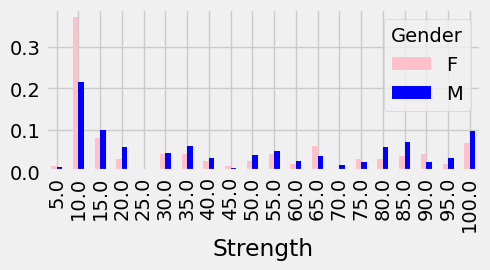

In [32]:
pd.crosstab(index=heroes['Strength'],
            columns=[heroes['Gender']],
            normalize='columns').plot.bar(color=['pink', 'blue'],
                                          stacked=False)
plt.show()

## SCATTER PLOT ( DIAGRAMMA DI DISPERSIONE )

- Abbiamo visto in una lezione precedente come generare direttamente un grafico di una serie senza elaborarla (calcolando per esempio le sue frequenze) produce un risultato che non è normalmente informativo.
- Le cose sono diverse quando si considerano congiuntamente due serie con un medesimo indice: in tal caso per ogni elemento di questo indice (e dunque per ogni osservazione), i valori delle due serie possono essere utilizzati per individuare le coordinate di un punto nel piano.
- Visualizzando i punti corrispondenti a tutte le osservazioni si ottiene un _diagramma di dispersione_ (o _scatter plot_).
- In pandas questo tipo di grafico si genera invocando il metodo `plot.scatter` sul _dataframe_ che contiene le osservazioni, indicando come argomenti i nomi dei caratteri che devono essere considerati (il primo dei quali verrà visualizzato sull'asse delle ascisse, usando invece quello delle ordinate per il secondo).
- Per esempio nella cella seguente viene visualizzato il diagramma di dispersione dei caratteri relativi ad altezza e peso dei supereroi di genere maschile.

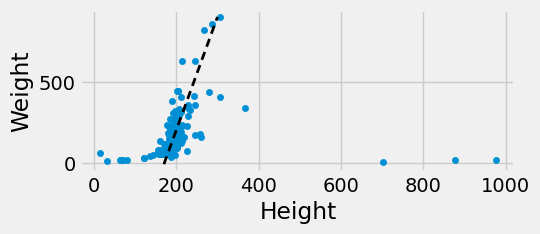

In [34]:
heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')

trend = lambda x: -1200 + x * 7
x_range = [170, 300]
line, = plt.plot(x_range, list(map(trend, x_range)), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)
plt.show()

- uso una lambda per una questione di comodità

- In questo caso la retta è stata posizionata «a mano»: esistono metodi che ci permettono di determinarla in funzione delle osservazioni.
- Per il momento mettiamo in evidenza la possibilità di definire in modo formale una retta scelta in modo da minimizzare una sua distanza da tutti i punti, utilizzando il cosiddetto _metodo dei minimi quadrati_.
- La cella seguente mostra come determinare tale retta, avendo cura di lavorare su una copia del _dataframe_ sulla quale invocare il metodo `dropna` che elimina le righe in cui è presente almeno un valore mancante.

/home/dread/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


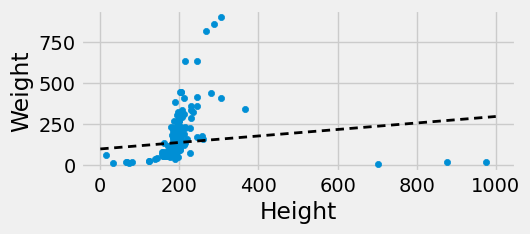

In [35]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

heroes_with_data = heroes[heroes['Gender']=='M'].copy().dropna()

X = heroes_with_data.loc[:, ['Height']]
Y = heroes_with_data['Weight']

regr.fit(X, Y)

heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')

line, = plt.plot([0, 1000], regr.predict([[0], [1000]]), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)

plt.show()

- questo grafico non è corretto per via degli outlier che incasinano tutto. Bisogna scartare i valori fuori range

/home/dread/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


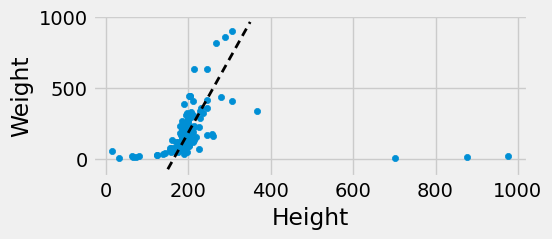

In [36]:
heroes_with_data = heroes_with_data[heroes_with_data['Height']<300]

X = heroes_with_data.loc[:, ['Height']]
Y = heroes_with_data['Weight']

regr.fit(X, Y)

heroes[heroes['Gender']=='M'].plot.scatter('Height', 'Weight')

line, = plt.plot([150, 350], regr.predict([[150], [350]]), color='black')
line.set_dashes([3, 2])
line.set_linewidth(2)

plt.show()

## DIAGRAMMA Quantile-Quantile

In [37]:
marvel = heroes.loc[(heroes['Publisher']=='Marvel Comics') & \
                    (heroes['Height'].between(150, 200))]

dc = heroes.loc[(heroes['Publisher']=='DC Comics') & \
                (heroes['Height'].between(150, 200))]

marvel_sample = marvel['Height'].sample(120)
dc_sample = dc['Height'].sample(120)

(marvel_sample.quantile(.2), dc_sample.quantile(.2))

(170.542, 170.298)

- Per ottenere il diagramma Q-Q ripetiamo ora questa operazione facendo variare i livelli in una discretizzazione che copra ragionevolmente l'intervallo $[0, 1]$ e visualizziamo sul piano cartesiano un punto per ogni coppia di quantili campionari che si riferiscono a uno stesso livello.

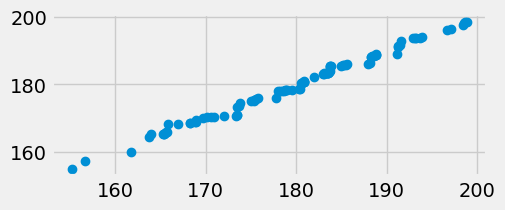

In [38]:
levels = np.linspace(0, 1, 100)
plt.plot(marvel_sample.quantile(levels),
         dc_sample.quantile(levels),
         'o')
plt.show()

- Il fatto che in ogni coppia considerata i due quantili fossero molto simili tra loro fa sì che i punti ottenuti si allineino approssimativamente sulla bisettrice del primo e del terzo quadrante.
- Possiamo evidenziare tale fatto sovrapponendo al diagramma il grafico della retta.

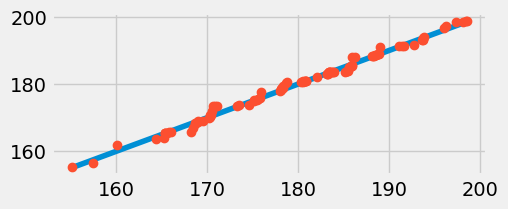

In [39]:
plt.plot([min(dc_sample), max(dc_sample)],
         [min(dc_sample), max(dc_sample)])
plt.plot(dc_sample.quantile(levels),
         marvel_sample.quantile(levels),
         'o')
plt.show()

- In realtà non è necessario costruire "a mano" i diagrammi Q-Q: il package `statmodels` mette a disposizione un oggetto `api` su cui invocare il metodo `qqplot_2samples` a cui passare direttamente i due campioni, aggiungendo l'argomento opzionale `line='45'` nel caso in cui si vuole tracciare anche il riferimento della bisettrice. 

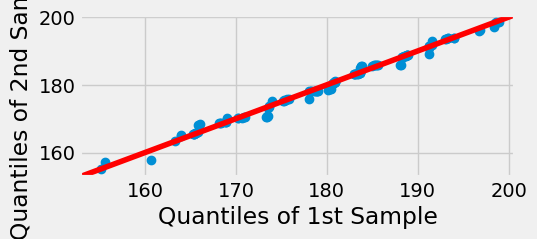

In [40]:
import statsmodels.api as sm

sm.qqplot_2samples(marvel_sample, dc_sample, line='45')
plt.show()

- Il diagramma prodotto da `qqplot_2samples` scambia il ruolo degli assi rispetto al diagramma precedente: è per questo motivo che i due campioni sono stati passati come argomenti considerandoli in ordine inverso rispetto a quanto fatto finora.
- In sintesi, il diagramma ottenuto ci permette di avvalorare l'ipotesi che l'altezza dei supereroi non segua una distribuzione diversa nei fumetti editi da DC e Marvel.
- Chiaramente, non è detto che due campioni seguano necessariamente una medesima distribuzione. In tal caso, i punti ottenuti non si disporranno vicino alla bisettrice. È questo il caso della distribuzione del peso tra supereroine e supereroi.

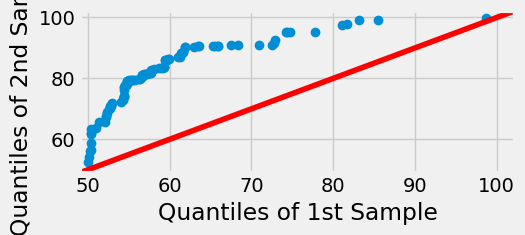

In [41]:
female = heroes.loc[(heroes['Gender']=='F') & \
                    (heroes['Weight'].between(50, 100))]

male = heroes.loc[(heroes['Gender']=='M') & \
                (heroes['Weight'].between(50, 100))]

female_sample = female['Weight'].sample(100)
male_sample = male['Weight'].sample(100)
sm.qqplot_2samples(female_sample, male_sample, line='45')
plt.show()

- La tecnica del Q-Q plot permette quindi in casi come questo di confutare l'ipotesi di partenza.
- Si nota infine che una standardizzazione dei dati permette di confinare il grafico ottenuto in prossimità dell'origine.
- In tal modo diventa più facile accorgersi di eventuali valori fuori scala.

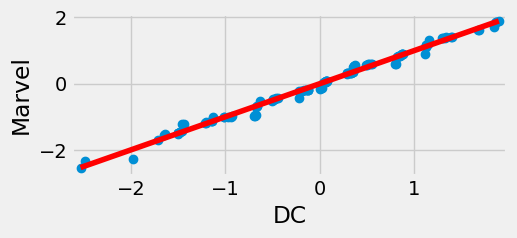

In [42]:
sm.qqplot_2samples((marvel_sample-marvel_sample.mean())/marvel_sample.std(),
                   (dc_sample-dc_sample.mean())/dc_sample.std(),
                   line='s',
                   xlabel='DC', ylabel='Marvel')
plt.show()

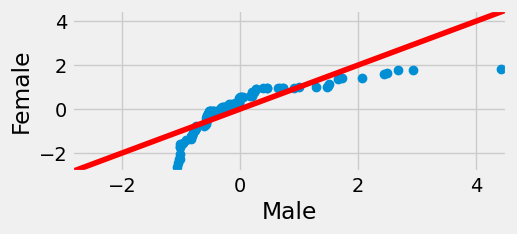

In [43]:
sm.qqplot_2samples((female_sample-female_sample.mean())/female_sample.std(),
                   (male_sample-male_sample.mean())/male_sample.std(),
                   line='45',
                   xlabel='Male', ylabel='Female')
plt.show()

## Simmetria, distribuzioni approssimativamente normali e regola empirica

- Alcuni dei grafici finora visti possono essere utili per mettere in evidenza una proprietà interessante di un campione di dati legata alla simmetria delle corrispondenti frequenze.
- Quando le frequenze, visualizzate a seconda dei casi tramite un grafico a barre o un istogramma, tendono a distribuirsi in modo simmetrico rispetto al valore della media campionaria si dice che il campione segue una distribuzione _approssimativamente simmetrica_.
- Il grafico qui sotto affianca l'istogramma e il box plot di un siffatto campione.
- La simmetria è visibile in entrambe le rappresentazioni: l'istogramma è approssimativamente simmetrico rispetto alla sua parte centrale e nel box plot i baffi hanno all'incirca la stessa lunghezza, così come la mediana si posiziona verso il centro della scatola.

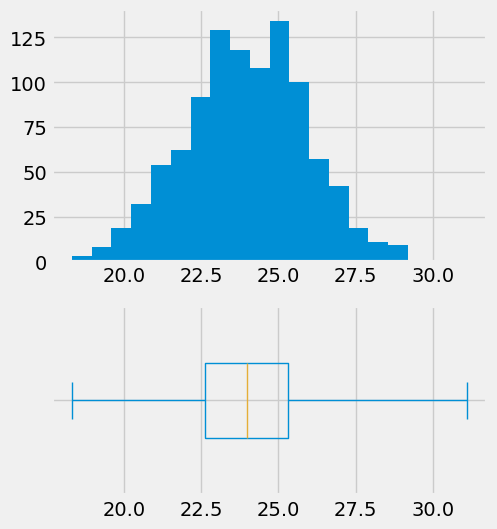

In [44]:
from scipy.stats import norm
sample = pd.Series(norm.rvs(24, 2, size=1000), name='')
f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6) # quanto voglio che sia grande tutto il grafico

h.yaxis.label.set_visible(False)

sample.plot.hist(bins=20, ax=h) # ax asse
sample.plot.box(vert=False, whis=[0,100], ax=b, widths=.4, label=None)
plt.show()

- attenzione che matplotlib ha due metodi:
    - subplots = preparara il grafico per mostrare tanti grafici diversi su una griglia ( dimensione della griglia specificata come parametro )
    - subplot = molto simile ma non ha detto esattamente cosa fa di diverso

- finire tuto 

# LEZIONE 07
- riferimenti:
    - L08 jupyter classificatori
    - L05 Jupyter eterogeneità
